In [42]:
import numpy as np
import pandas as pd
from scipy import stats, signal, integrate
from matplotlib.pyplot import *

%matplotlib inline

In [7]:
def get_mag(d):
    return np.sqrt(np.array(d.x**2+d.y**2+d.z**2))
def specgram_plot(fname):
    d = pd.read_csv(fname)
    Fs = 1/np.mean(np.diff(d.timestamp))
    print(Fs)
    mag = get_mag(d)
    mag = mag - np.mean(mag)
    nfft = int(round(Fs - 10))
    nover = nfft - 2
    # Specgram
    _ = specgram(mag, NFFT=nfft, noverlap=nover, Fs=Fs)

71.175


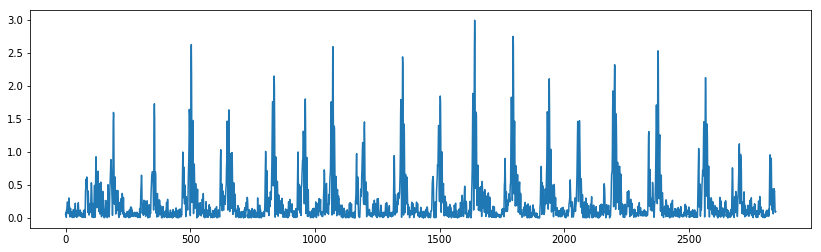

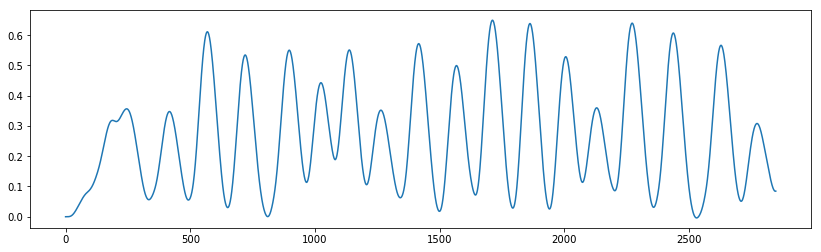

In [41]:
d = pd.read_csv('../data_accel/false_pos_talk_cough_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print(Fs)
mag = get_mag(d)
mag = mag - np.mean(mag)

b, a = signal.butter(4, (35/(Fs/2)), btype='lowpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)


c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)

70.3432189494


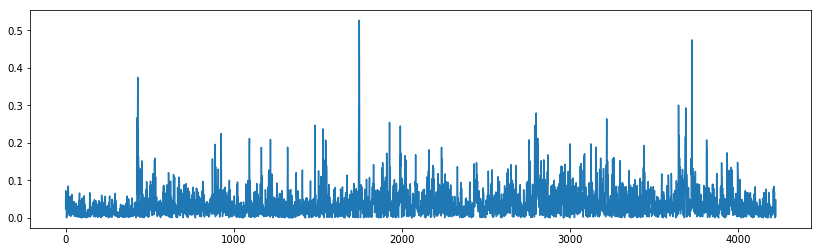

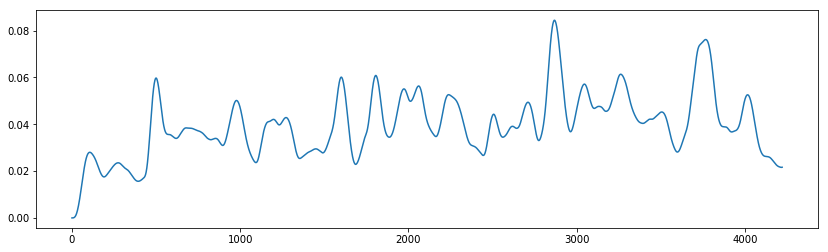

In [14]:
d = pd.read_csv('../data_accel/false_pos_driving_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print(Fs)
mag = get_mag(d)
mag = mag - np.mean(mag)

b, a = signal.butter(4, (20/(Fs/2)), btype='highpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(4, (.5/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)


# test = mag[120:160]
# test = test - np.mean(test)
# test = test / np.linalg.norm(test)
# figure(figsize=(14,4))
# plot(test)
# hlines(30, 0, len(test))
# (len(test), test)


72.1092969239


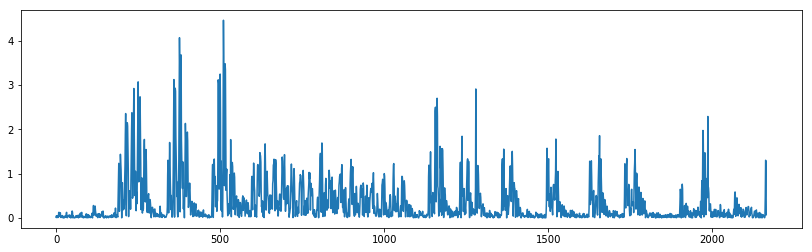

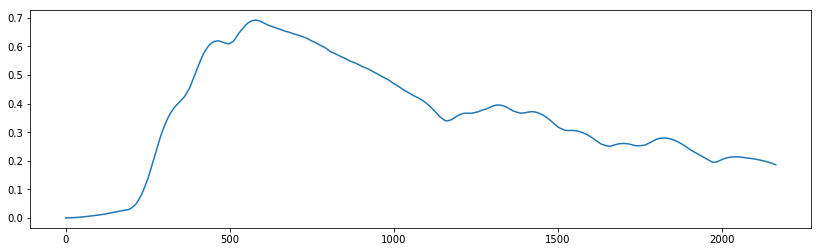

In [40]:
d = pd.read_csv('../data_accel/accurate_belly_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print(Fs)
mag = get_mag(d)
mag = mag - np.mean(mag)


b, a = signal.butter(1, (5/(Fs/2)), btype='highpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(2, (.1/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)

70.3432189494


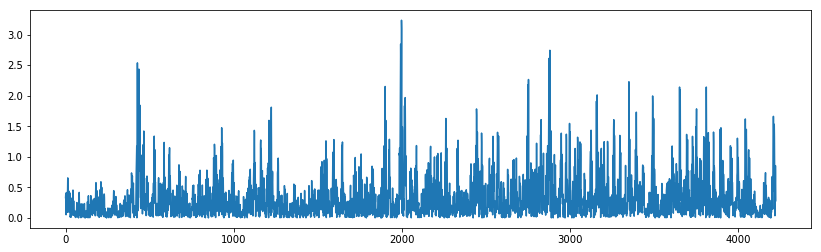

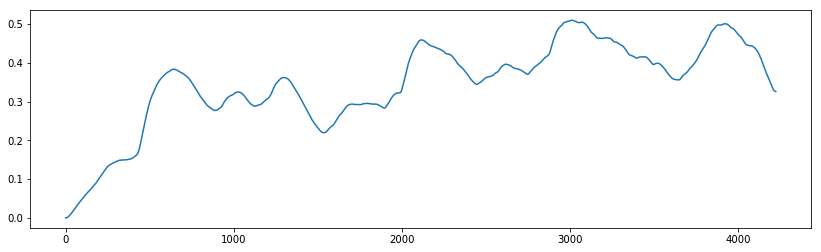

In [38]:
d = pd.read_csv('../data_accel/false_pos_driving_1.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
print(Fs)
mag = get_mag(d)
mag = mag - np.mean(mag)


b, a = signal.butter(1, (5/(Fs/2)), btype='highpass')
mag = signal.lfilter(b, a, mag)
mag = (abs(mag[:]))
figure(figsize=(14,4))
plot(mag)

c, d = signal.butter(2, (.1/(Fs/2)), btype='lowpass')
mag_2 = signal.lfilter(c, d, mag)
figure(figsize=(14,4))
plot(mag_2)



72.1092969239


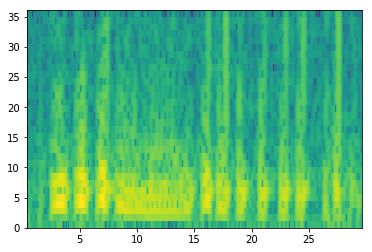

In [18]:
specgram_plot('../data_accel/accurate_belly_1.csv')

72.1092963511


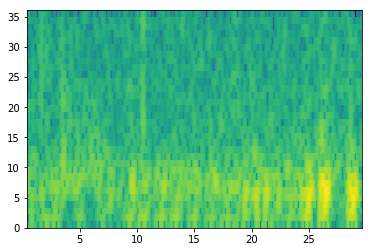

In [22]:
specgram_plot('../data_accel/false_pos_rest_1.csv')

72.0093302461


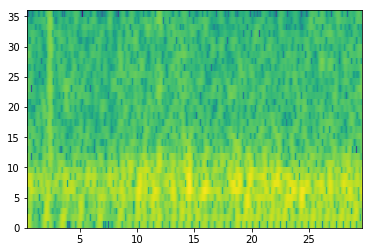

In [23]:
specgram_plot('../data_accel/false_pos_seat_movement_1.csv')

70.4666666667


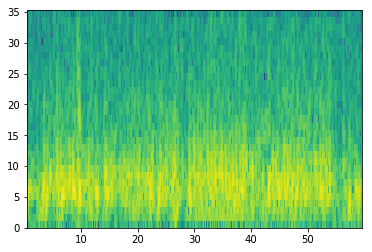

In [27]:
specgram_plot('../data_accel/false_pos_driving_high_1.csv')

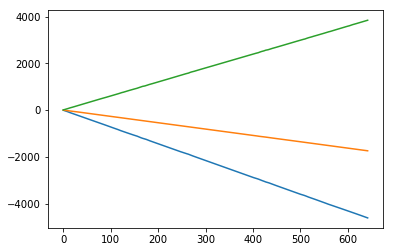

In [58]:
d = pd.read_csv('../data_accel/false_pos_cough_1.csv')
X = np.vstack([d.x, d.y, d.z]).T
plot(np.cumsum(X,axis=0))